## Importing the Orders file

In [1]:
#importing pandas package
# changing column order_time to datetime format for time series analysis

import pandas as pd
orders = pd.read_csv("order_details.csv", parse_dates=["order_time"])

# checking the first order_date
orders.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,2024-12-10 11:38:36,109.0
1,2,2,1/1/23,2024-12-10 11:57:40,108.0
2,3,2,1/1/23,2024-12-10 11:57:40,124.0
3,4,2,1/1/23,2024-12-10 11:57:40,117.0
4,5,2,1/1/23,2024-12-10 11:57:40,129.0


In [2]:
# checking the latest order_date

orders.tail()

,order_details_id,order_id,order_date,order_time,item_id
12229,12230,5369,3/31/23,2024-12-10 22:05:04,109.0
12230,12231,5369,3/31/23,2024-12-10 22:05:04,129.0
12231,12232,5369,3/31/23,2024-12-10 22:05:04,120.0
12232,12233,5369,3/31/23,2024-12-10 22:05:04,122.0
12233,12234,5370,3/31/23,2024-12-10 22:15:48,122.0


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12234 non-null  int64         
 1   order_id          12234 non-null  int64         
 2   order_date        12234 non-null  object        
 3   order_time        12234 non-null  datetime64[ns]
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 478.0+ KB


In [4]:
# checking for missing values

orders.isna().sum()

order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64

In [5]:
# cleaning up missing values

orders = orders.dropna()

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  object        
 3   order_time        12097 non-null  datetime64[ns]
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 567.0+ KB


---

## Importing the Menu file

In [6]:
menu = pd.read_csv("menu_items.csv")

menu.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [7]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


---

## Joining both the imported files

In [8]:
order_items = (
              orders.merge(menu,
                          how="left",
                          left_on="item_id",
                          right_on="menu_item_id") 
            )

order_items.head()

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,1/1/23,2024-12-10 11:38:36,109.0,109,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,2024-12-10 11:57:40,108.0,108,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,2024-12-10 11:57:40,124.0,124,Spaghetti,Italian,14.50
3,4,2,1/1/23,2024-12-10 11:57:40,117.0,117,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,2024-12-10 11:57:40,129.0,129,Mushroom Ravioli,Italian,15.50


In [9]:
# dropping duplicate columns after merging

order_items = order_items.drop(["menu_item_id"], axis = 1)

order_items.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,1/1/23,2024-12-10 11:38:36,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,2024-12-10 11:57:40,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,2024-12-10 11:57:40,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,2024-12-10 11:57:40,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,2024-12-10 11:57:40,129.0,Mushroom Ravioli,Italian,15.50


---

## Adding Tax and Total Revenue Columns

In [10]:
# adding tax column

order_items["sales_tax"] = (order_items.price * .08).round(2)
order_items["total_revenue"] = order_items.price + order_items.sales_tax

order_items.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,1/1/23,2024-12-10 11:38:36,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,1/1/23,2024-12-10 11:57:40,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,1/1/23,2024-12-10 11:57:40,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,1/1/23,2024-12-10 11:57:40,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,1/1/23,2024-12-10 11:57:40,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [11]:
order_items.describe()

,order_details_id,order_id,item_id,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,115.202282,13.161767,1.055128,14.216895
std,3531.337208,1545.826452,9.387580,3.986392,0.320078,4.306466
min,1.000000,1.000000,101.000000,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,107.000000,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,114.000000,13.950000,1.120000,15.070000
75%,9175.000000,4020.000000,123.000000,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,132.000000,19.950000,1.600000,21.550000


In [12]:
order_items.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_details_id,12097.0,6118.950897,3531.337208,1.0,3064.00,6119.00,9175.00,12234.00
order_id,12097.0,2692.569149,1545.826452,1.0,1353.00,2711.00,4020.00,5370.00
item_id,12097.0,115.202282,9.387580,101.0,107.00,114.00,123.00,132.00
price,12097.0,13.161767,3.986392,5.0,10.50,13.95,16.50,19.95
sales_tax,12097.0,1.055128,0.320078,0.4,0.84,1.12,1.32,1.60
total_revenue,12097.0,14.216895,4.306466,5.4,11.34,15.07,17.82,21.55


---

## Analyzing Best and Worst Selling Items

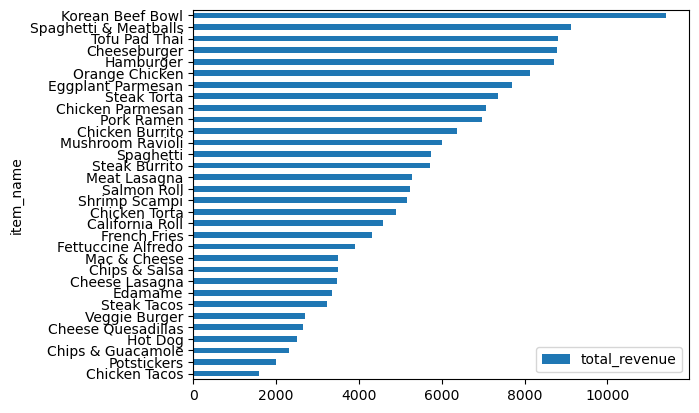

In [13]:
(
order_items
.groupby("item_name")
.agg({"total_revenue":"sum"})
.sort_values("total_revenue")
.plot
.barh()
);

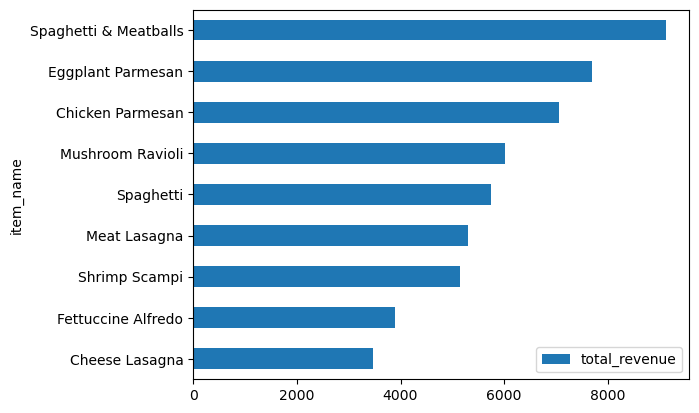

In [14]:
# focusing on Italian Category

(
order_items
.query("category == 'Italian'")
.groupby("item_name")
.agg({"total_revenue":"sum"})
.sort_values("total_revenue")
.plot
.barh()
);

---

## Analyzing the rush hours during the weekday

In [17]:
# setting order_time column as index for Time Series Analysis

(
order_items
.set_index("order_time")
)

,order_details_id,order_id,order_date,item_id,item_name,category,price,sales_tax,total_revenue
order_time,,,,,,,,,
2024-12-10 11:38:36,1,1,1/1/23,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
2024-12-10 11:57:40,2,2,1/1/23,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2024-12-10 11:57:40,3,2,1/1/23,124.0,Spaghetti,Italian,14.50,1.16,15.66
2024-12-10 11:57:40,4,2,1/1/23,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
2024-12-10 11:57:40,5,2,1/1/23,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
...,...,...,...,...,...,...,...,...,...
2024-12-10 22:05:04,12230,5369,3/31/23,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
2024-12-10 22:05:04,12231,5369,3/31/23,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
2024-12-10 22:05:04,12232,5369,3/31/23,120.0,Steak Torta,Mexican,13.95,1.12,15.07


In [42]:
# creating two new columns

order_items["dayofweek"] = order_items.order_time.dt.dayofweek
order_items["hour"] = order_items["order_time"].dt.hour


order_items.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue,day_of_week,hour,dayofweek
0,1,1,1/1/23,2024-12-10 11:38:36,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,1,11,1
1,2,2,1/1/23,2024-12-10 11:57:40,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,1,11,1
2,3,2,1/1/23,2024-12-10 11:57:40,124.0,Spaghetti,Italian,14.50,1.16,15.66,1,11,1
3,4,2,1/1/23,2024-12-10 11:57:40,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99,1,11,1
4,5,2,1/1/23,2024-12-10 11:57:40,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74,1,11,1


In [26]:
# pivoting the above data


order_items.pivot_table(index = "hour",
                  columns = "dayofweek",
                  values = "total_revenue",
                  aggfunc = "sum"
                 )

dayofweek,1
hour,
10,68.43
11,8773.58
12,23459.52
13,22294.93
14,13627.10
15,10589.90
16,14810.85
17,19302.02
18,18213.14


<Axes: title={'center': 'Rush hours during weekday'}, xlabel='Total Revenue', ylabel='Hour'>

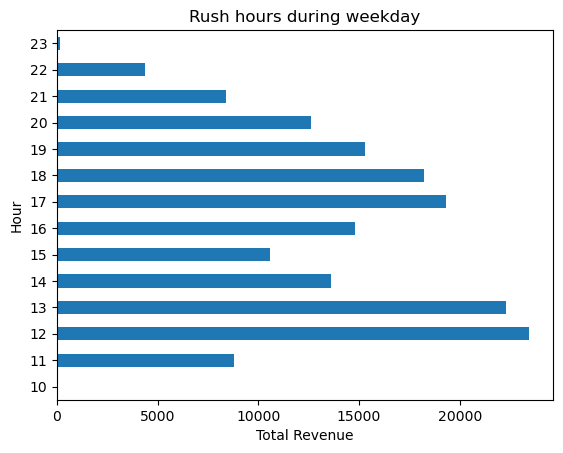

In [38]:
# plotting 

(
order_items.pivot_table(index = "hour",
                  columns = "dayofweek",
                  values = "total_revenue",
                  aggfunc = "sum"
                 )
                 .plot
                 .barh(
                       title = "Rush hours during weekday",
                       xlabel = "Total Revenue",
                       ylabel = "Hour",
                       legend=None
                       )
)

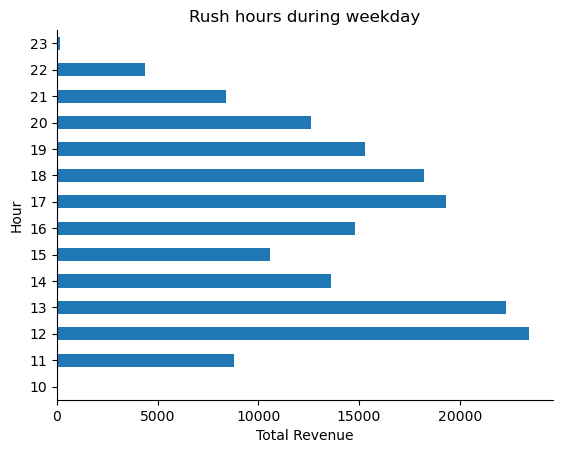

In [39]:
# importing seaborn

import seaborn as sns

(
order_items.pivot_table(index = "hour",
                  columns = "dayofweek",
                  values = "total_revenue",
                  aggfunc = "sum"
                 )
                 .plot
                 .barh(
                       title = "Rush hours during weekday",
                       xlabel = "Total Revenue",
                       ylabel = "Hour",
                       legend=None
                       )
)

sns.despine()